# Examples of workflow plots

In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt

### Range to plot, has to be exactly 10

In [22]:
start = 0
stop = 10
output_dir = '../filtered_workloads_1s'

In [23]:
plot_data = []

for idx in range(start, stop):
    file_path = os.path.join(output_dir, f'{idx}.csv')
    df = pd.read_csv(file_path)
    plot_data.append(df)

In [24]:
plot_data[4]

,timestamp,power_draw_W,memory_free_MiB,memory_used_MiB,utilization_memory_pct,utilization_gpu_pct,id_user,cpus_req,mem_req,gres_used,nodes_alloc,timelimit,time_submit,time_start,time_end,time_eligible
0,0,42.078067,32510.00,0.00,0.00,0.000000,1.706828e+12,10.0,40000.0,0.0,1.0,420.0,1.627486e+09,1.627486e+09,1.627487e+09,1.627486e+09
1,1,42.061311,32510.00,0.00,0.00,0.000000,1.706828e+12,10.0,40000.0,0.0,1.0,420.0,1.627486e+09,1.627486e+09,1.627487e+09,1.627486e+09
2,2,42.078722,32510.00,0.00,0.00,0.000000,1.706828e+12,10.0,40000.0,0.0,1.0,420.0,1.627486e+09,1.627486e+09,1.627487e+09,1.627486e+09
3,3,42.072000,32510.00,0.00,0.00,0.000000,1.706828e+12,10.0,40000.0,0.0,1.0,420.0,1.627486e+09,1.627486e+09,1.627487e+09,1.627486e+09
4,4,42.084989,32510.00,0.00,0.00,0.000000,1.706828e+12,10.0,40000.0,0.0,1.0,420.0,1.627486e+09,1.627486e+09,1.627487e+09,1.627486e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,56,49.397067,31201.00,1309.00,1.98,20.596667,1.706828e+12,10.0,40000.0,0.0,1.0,420.0,1.627486e+09,1.627486e+09,1.627487e+09,1.627486e+09
57,57,49.439689,31201.00,1309.00,1.98,20.514444,1.706828e+12,10.0,40000.0,0.0,1.0,420.0,1.627486e+09,1.627486e+09,1.627487e+09,1.627486e+09
58,58,49.714622,31201.00,1309.00,1.98,20.826667,1.706828e+12,10.0,40000.0,0.0,1.0,420.0,1.627486e+09,1.627486e+09,1.627487e+09,1.627486e+09
59,59,44.435456,31201.00,1309.00,0.56,6.223333,1.706828e+12,10.0,40000.0,0.0,1.0,420.0,1.627486e+09,1.627486e+09,1.627487e+09,1.627486e+09


## Power usage

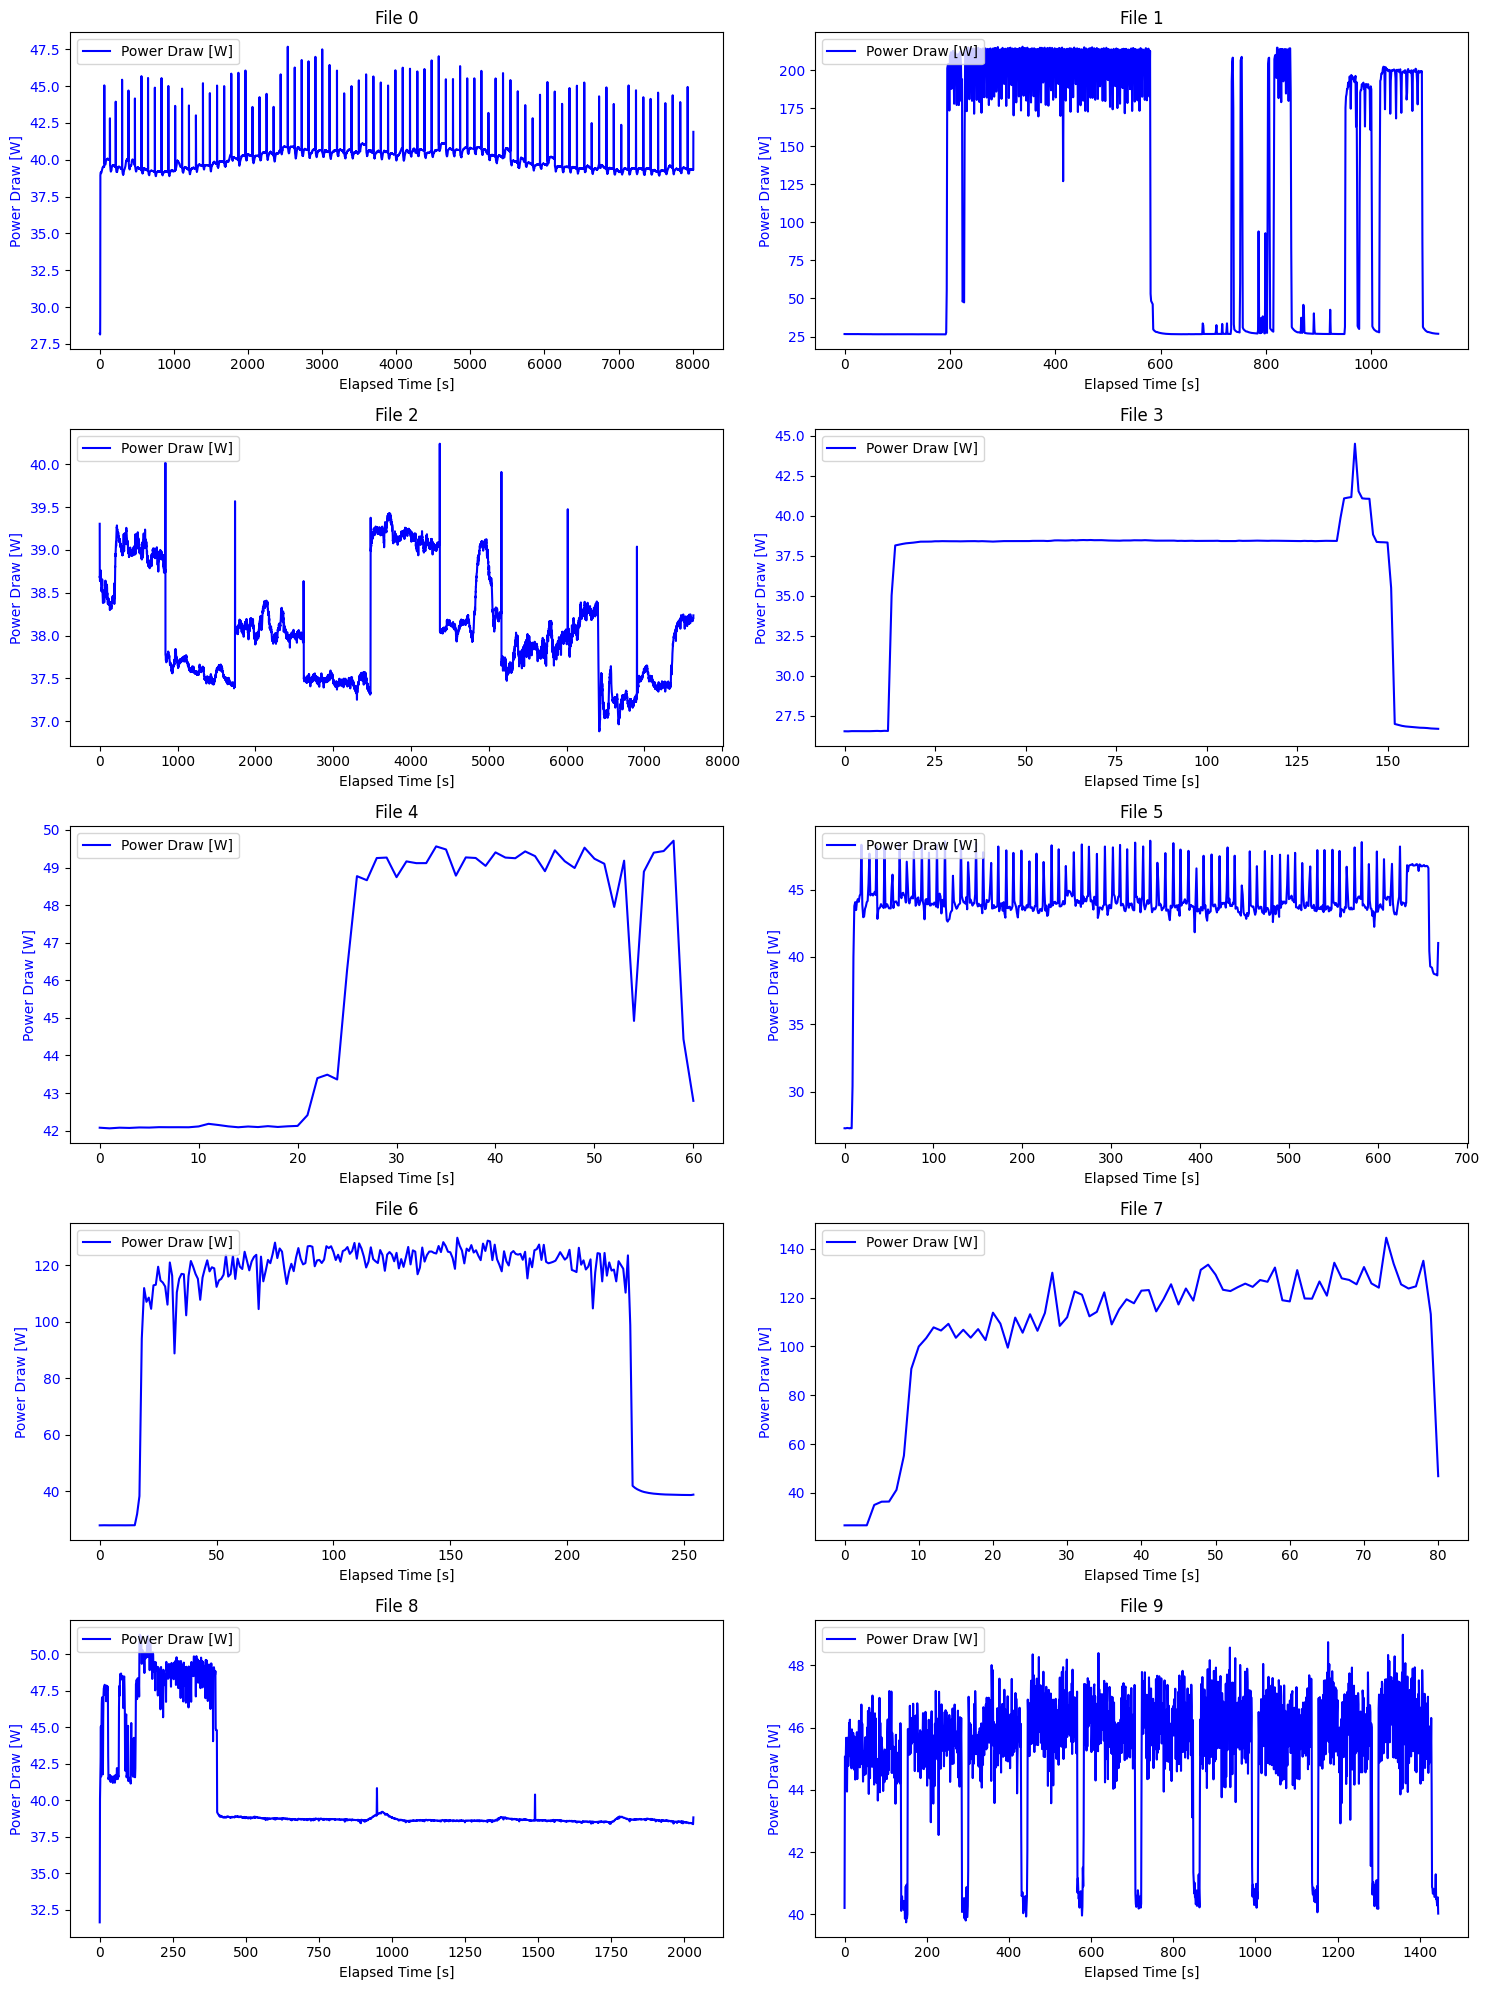

In [25]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for idx, (ax, df) in enumerate(zip(axes, plot_data)):
    # Plot power drawn on the primary y-axis
    ax.plot(df['timestamp'], df['power_draw_W'], color='blue', label='Power Draw [W]')
    ax.set_ylabel('Power Draw [W]', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    
    # Create a twin y-axis for utilization percentage
    #ax2 = ax.twinx()
    #ax2.plot(df['timestamp'], df['utilization_gpu_pct'], color='green', label='GPU Utilization [%]')
    #ax2.set_ylabel('GPU Utilization [%]', color='green')
    #ax2.tick_params(axis='y', labelcolor='green')

    # Add a title and x-axis label
    ax.set_title(f'File {idx}')
    ax.set_xlabel('Elapsed Time [s]')
    
    # Add legends
    ax.legend(loc='upper left')
    #ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


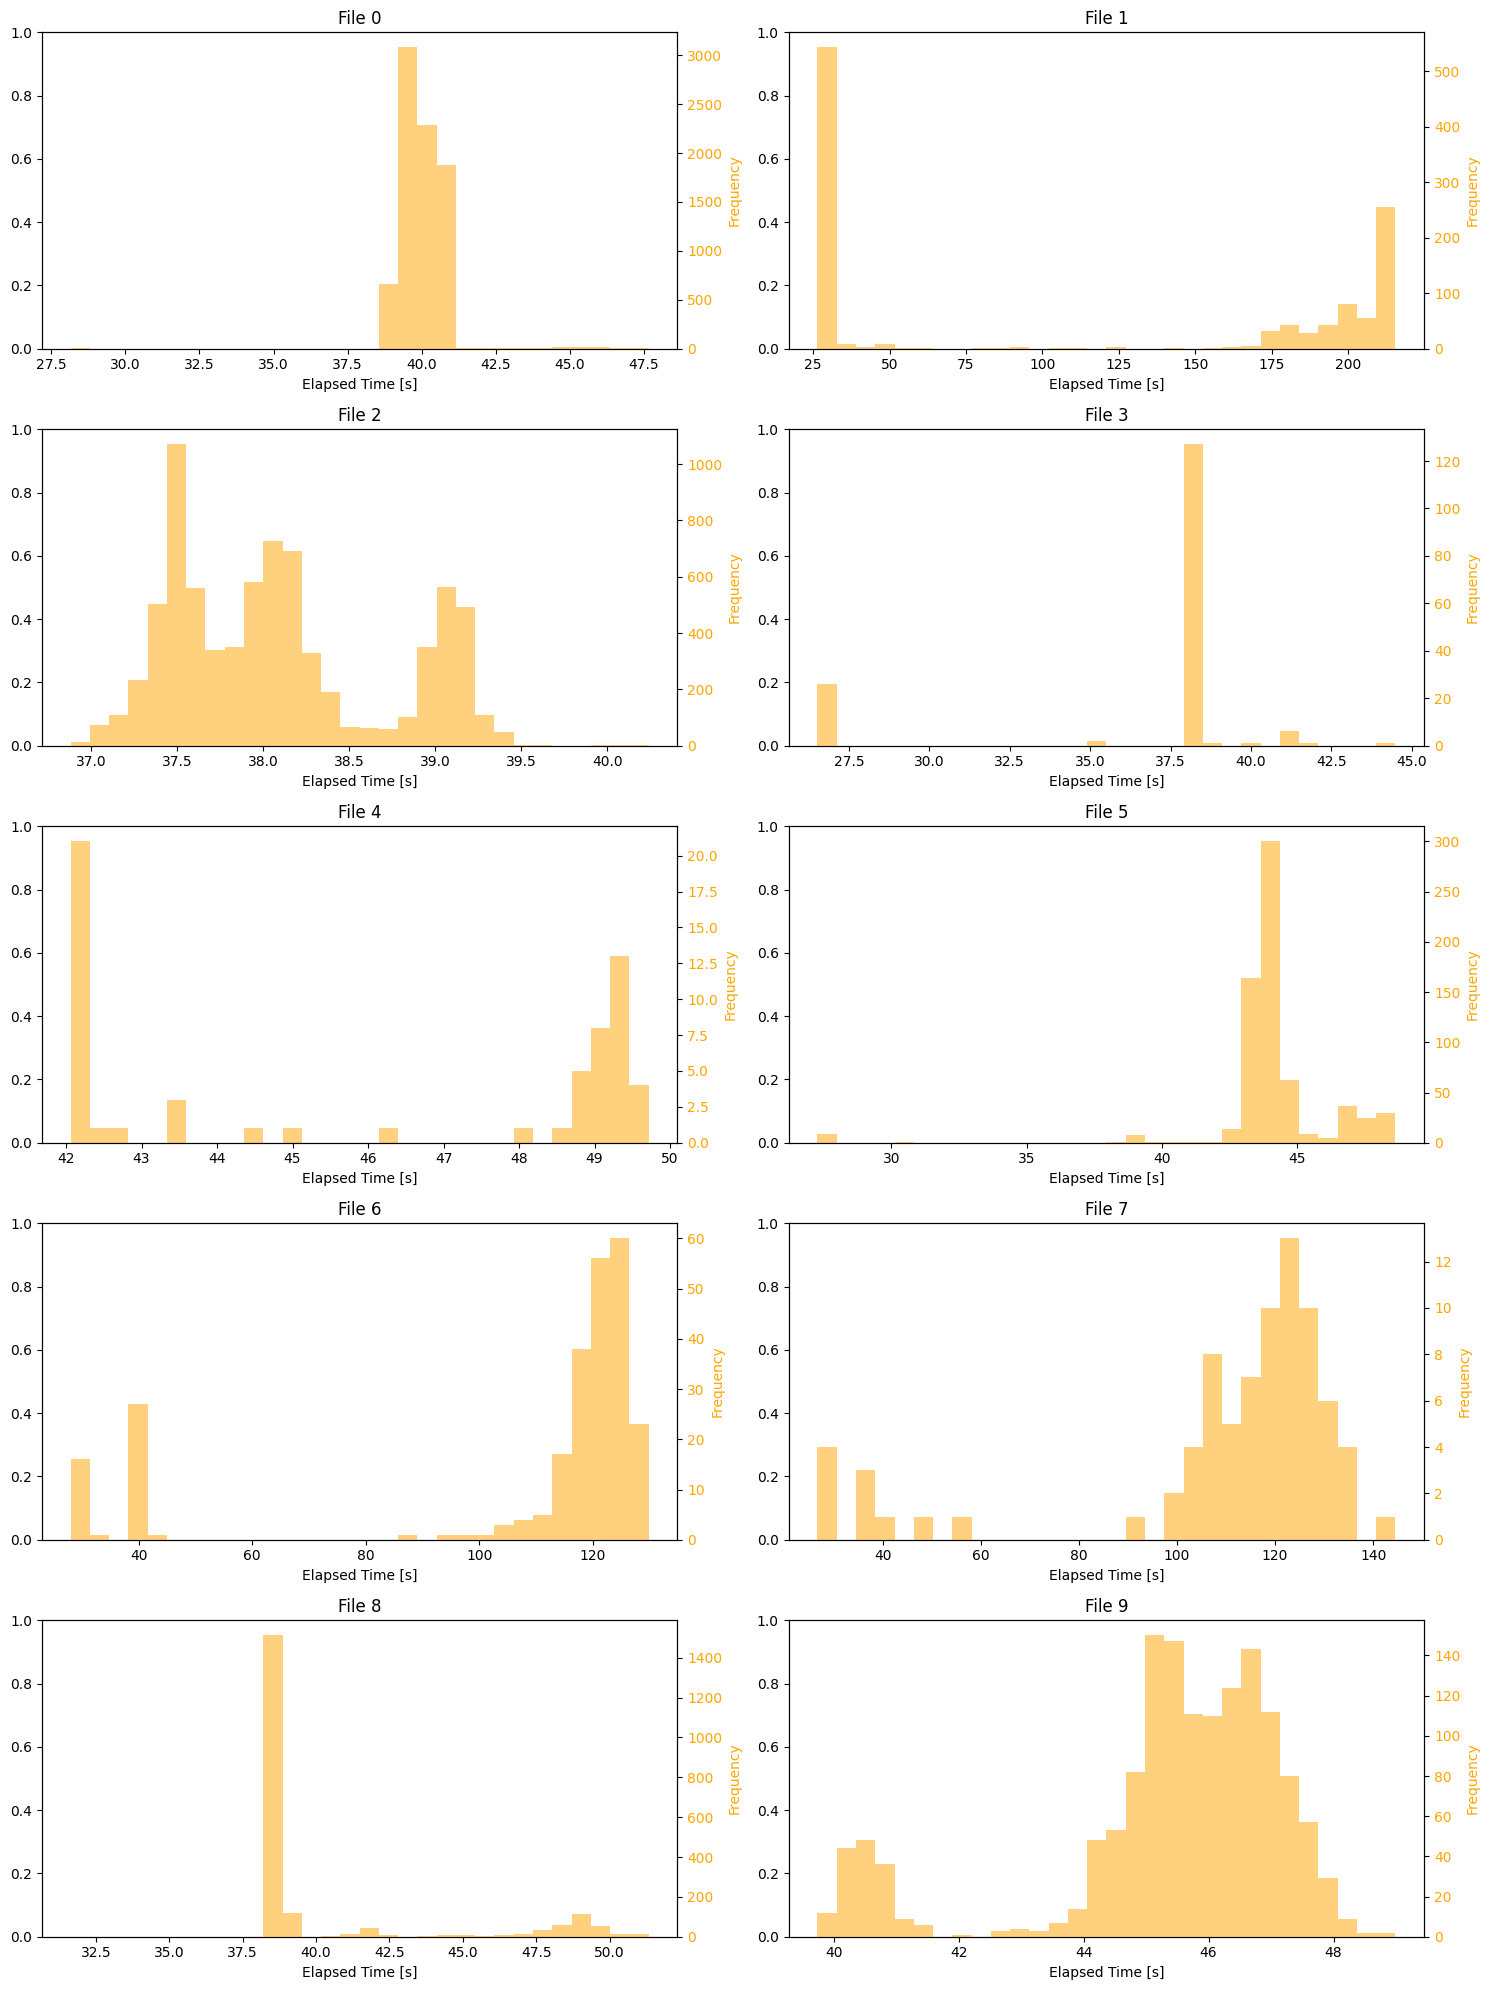

In [26]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for idx, (ax, df) in enumerate(zip(axes, plot_data)):
    # Plot power drawn on the primary y-axis
    #ax.plot(df['timestamp'], df['power_draw_W'], color='blue', label='Power Draw [W]')
    #ax.set_ylabel('Power Draw [W]', color='blue')
    #ax.tick_params(axis='y', labelcolor='blue')
    
    # Create a histogram for a chosen variable (e.g., power_draw_W)
    ax_hist = ax.twinx()  # Create a twin axis for the histogram
    ax_hist.hist(df['power_draw_W'], bins=30, color='orange', alpha=0.5, label='Power Histogram')
    ax_hist.set_ylabel('Frequency', color='orange')
    ax_hist.tick_params(axis='y', labelcolor='orange')

    # Add a title and x-axis label
    ax.set_title(f'File {idx}')
    ax.set_xlabel('Elapsed Time [s]')
    
    # Add legends
    #ax.legend(loc='upper left')
    #ax_hist.legend(loc='upper right')

plt.tight_layout()
plt.show()

## Memory 

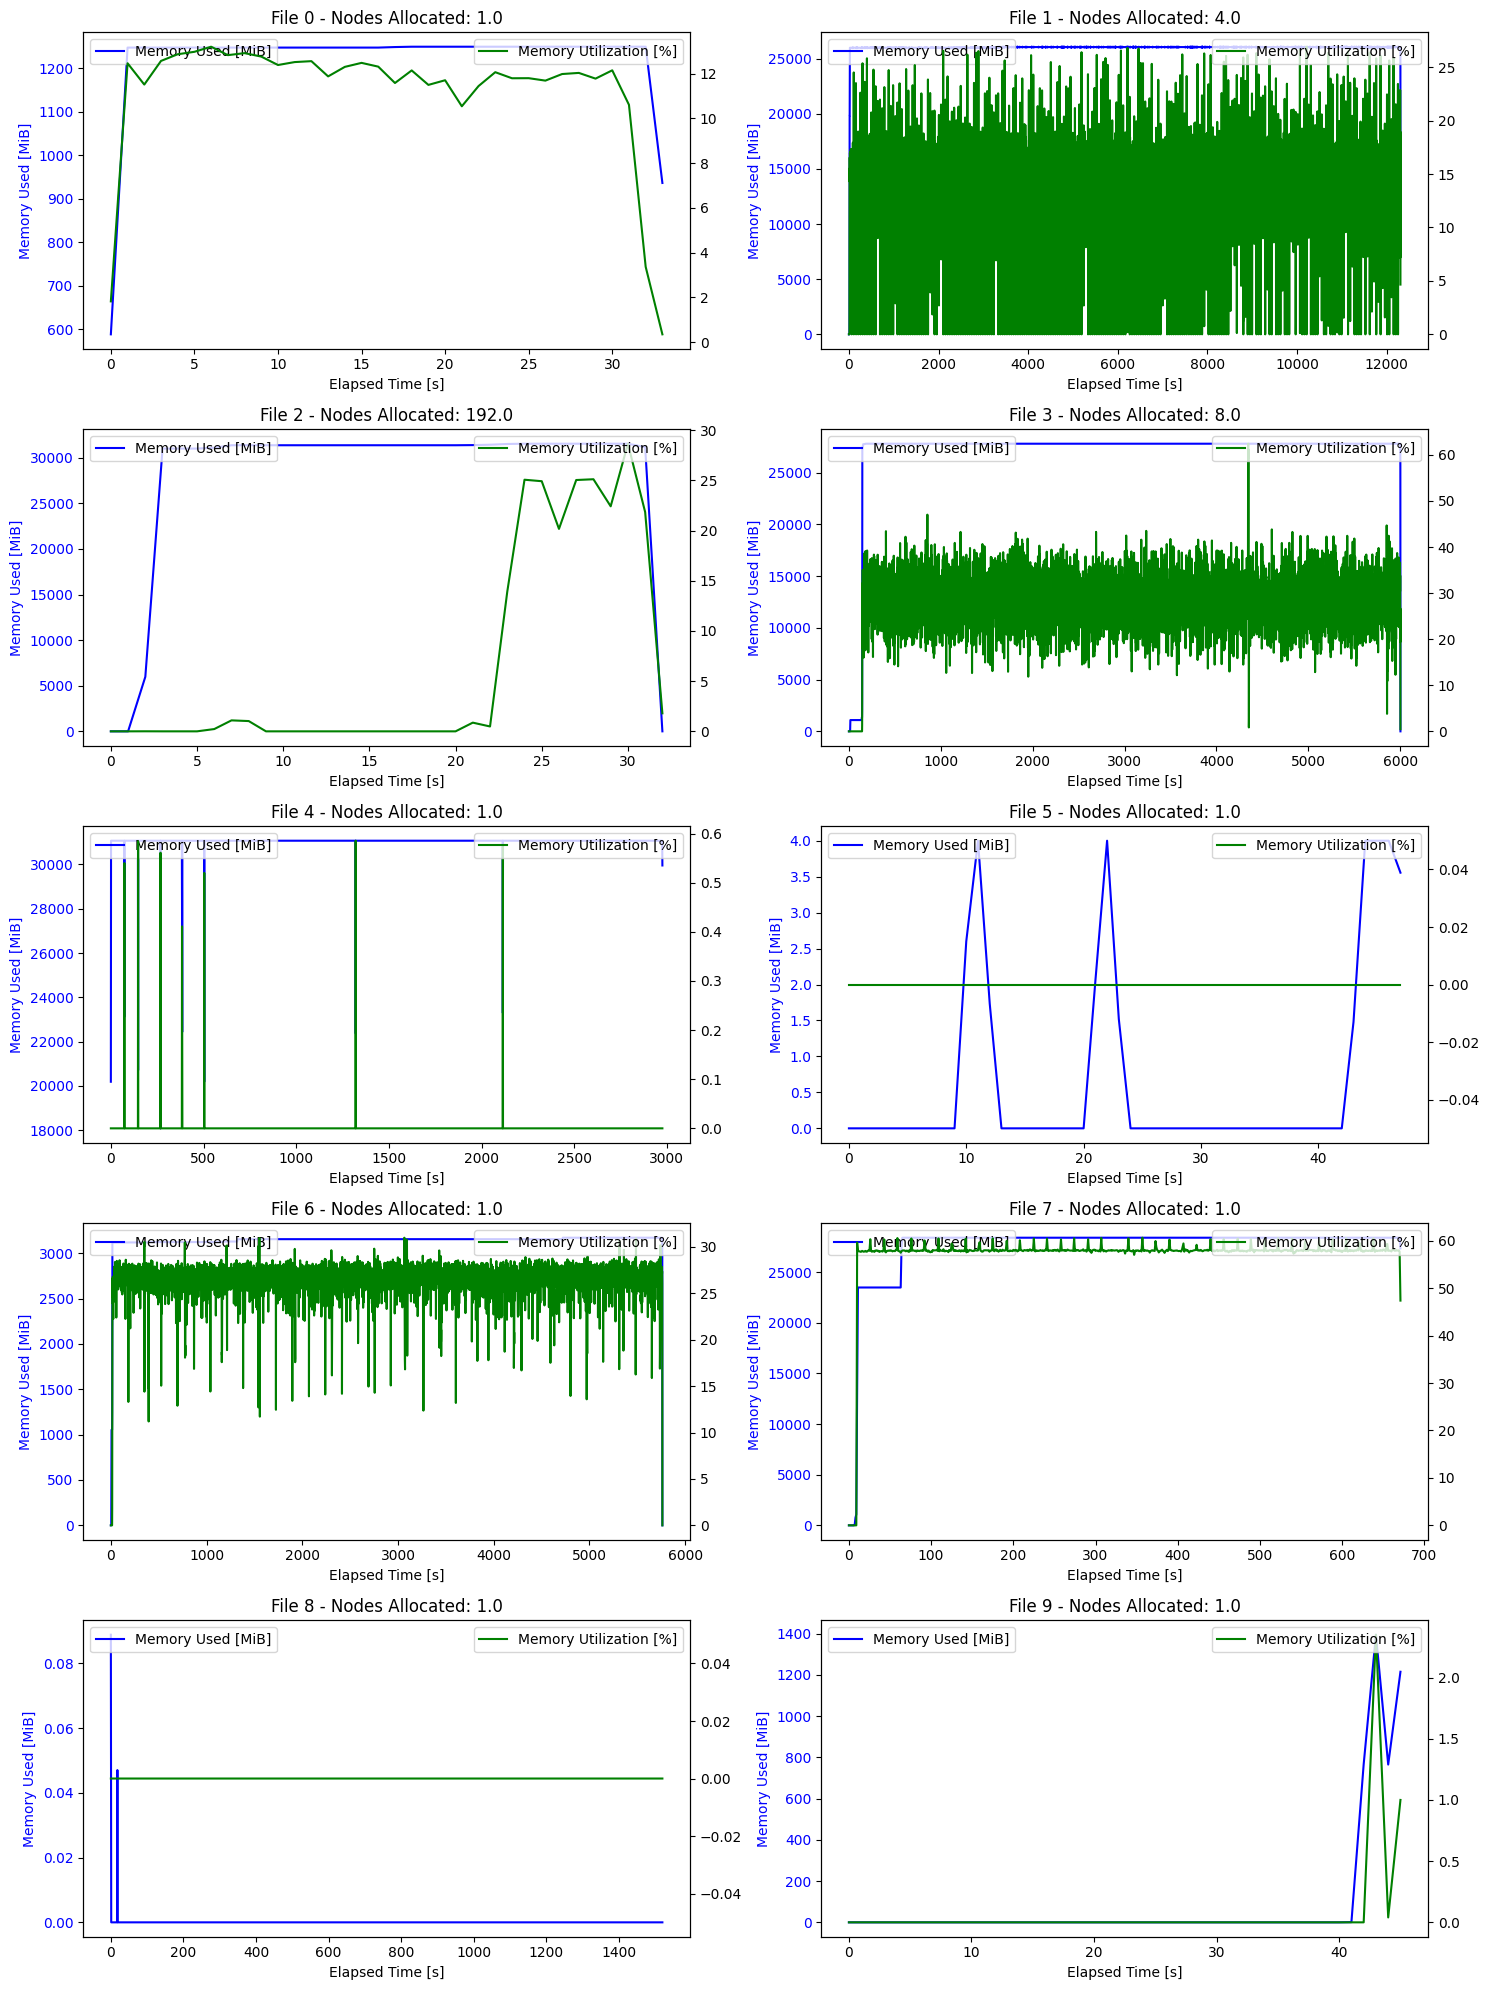

In [38]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for idx, (ax, df) in enumerate(zip(axes, plot_data)):
    # Plot memory used on the primary y-axis
    ax.plot(df['timestamp'], df['memory_used_MiB'], color='blue', label='Memory Used [MiB]')
    ax.set_ylabel('Memory Used [MiB]', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    
    # Create a twin y-axis for utilization and nodes allocated
    ax2 = ax.twinx()
    
    # Plot utilization memory percentage
    ax2.plot(df['timestamp'], df['utilization_memory_pct'], color='green', label='Memory Utilization [%]')
    
    # Add title and include nodes_alloc
    nodes_alloc = df['nodes_alloc'].max()  # You can use max, mean, or other stats
    ax.set_title(f'File {idx} - Nodes Allocated: {nodes_alloc}')
    ax.set_xlabel('Elapsed Time [s]')
    
    # Add legends for both y-axes
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()


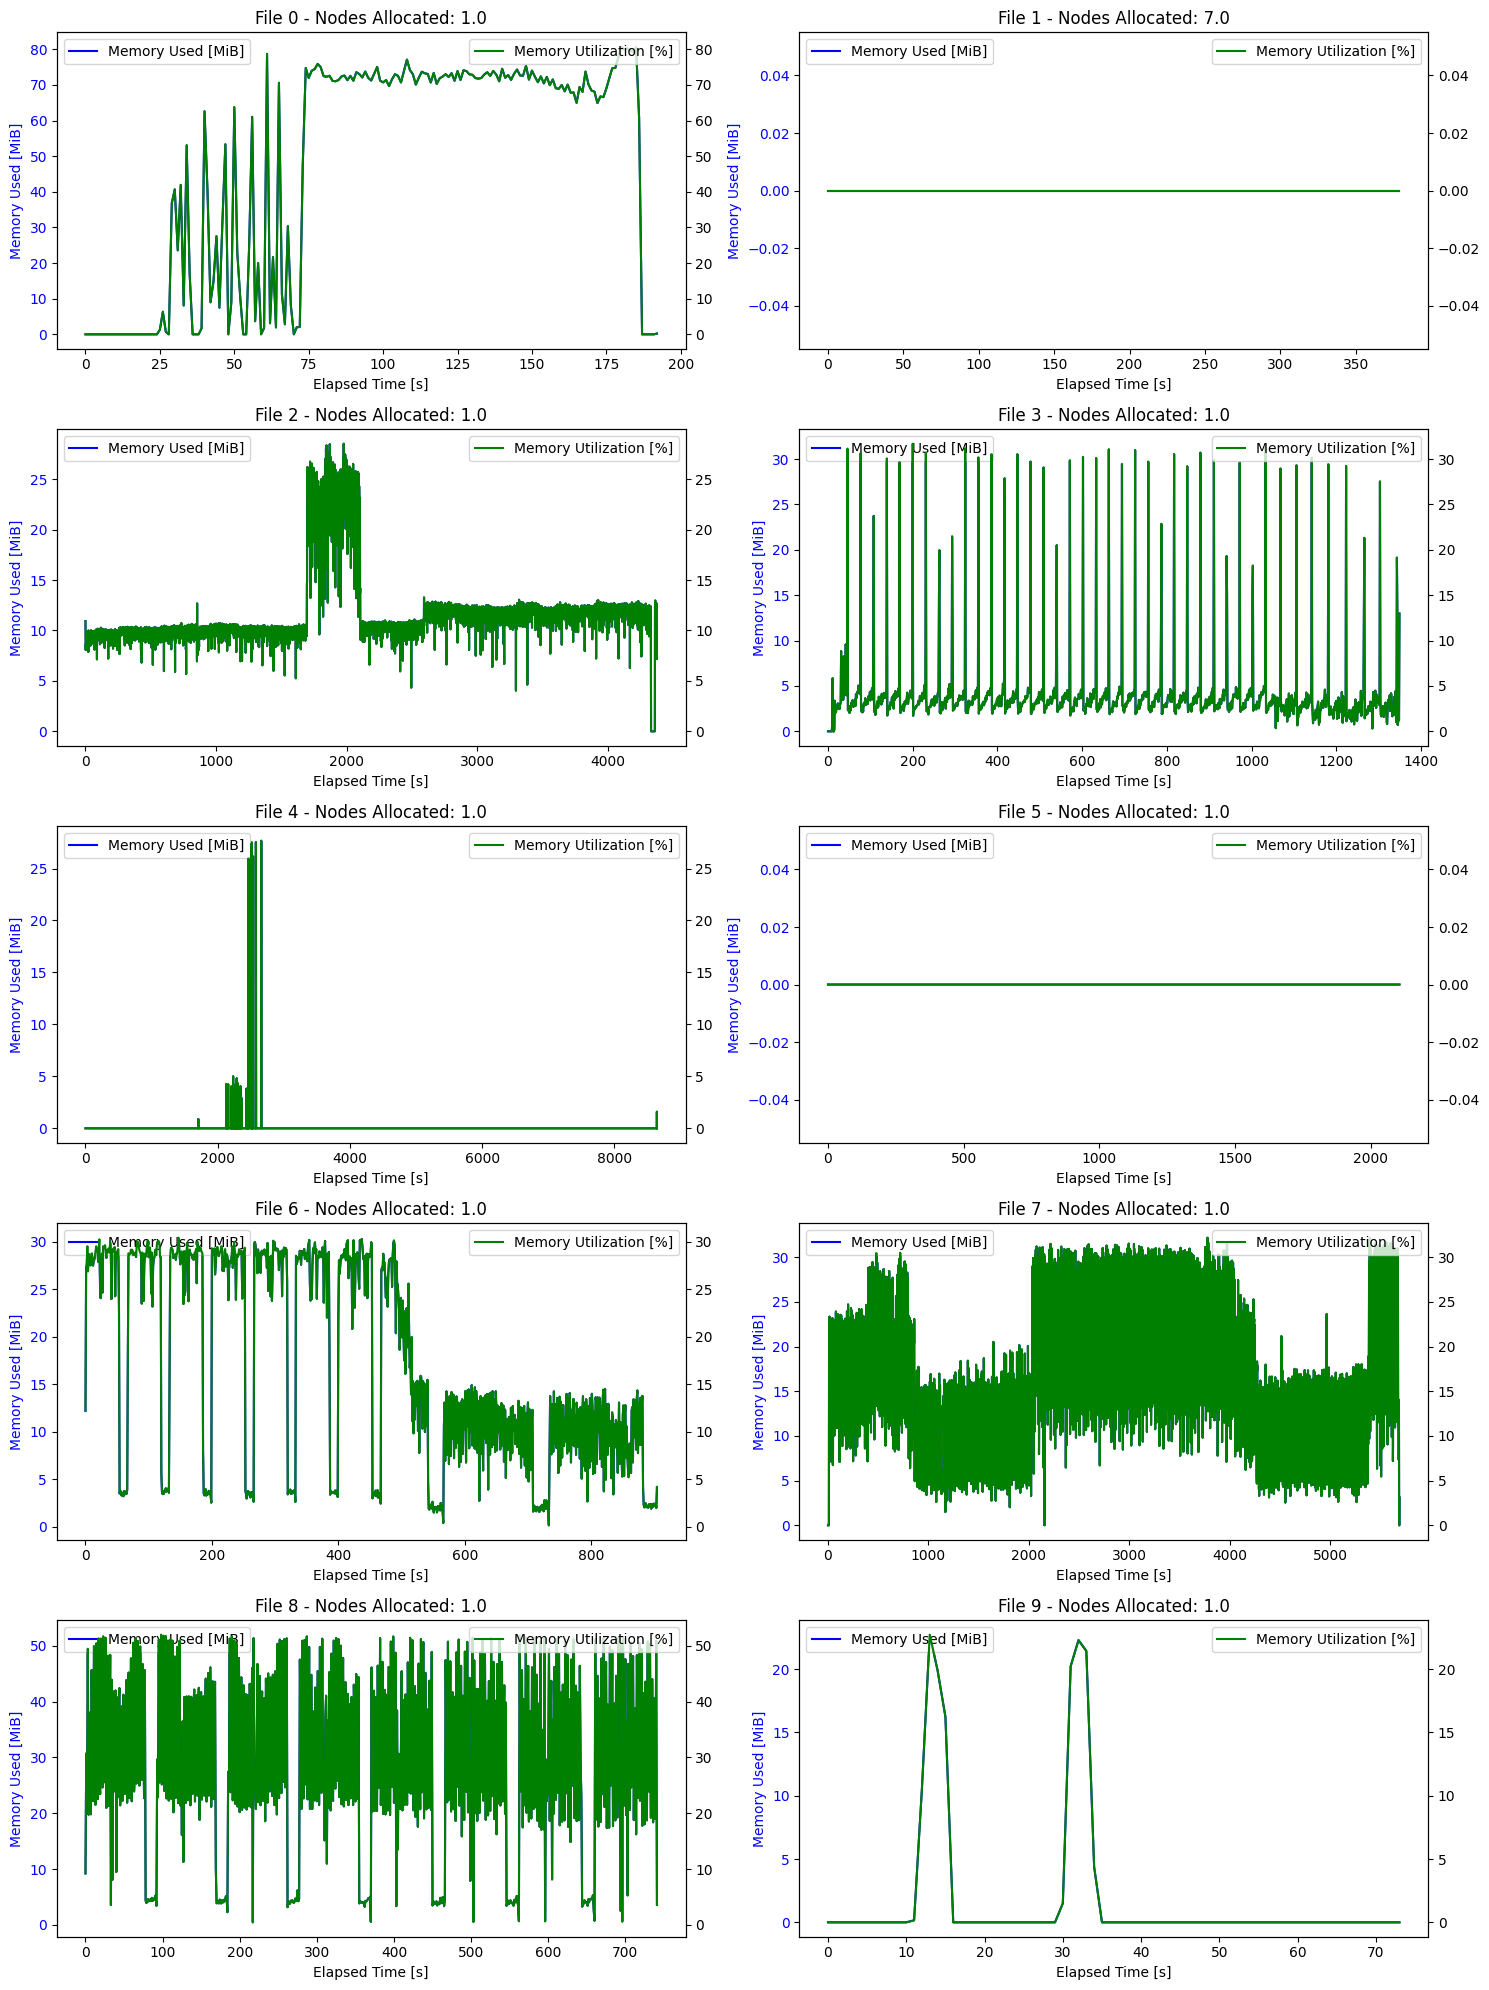

In [58]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
axes = axes.flatten()

for idx, (ax, df) in enumerate(zip(axes, plot_data)):
    # Plot memory used on the primary y-axis
    ax.plot(df['timestamp'], df['utilization_gpu_pct'], color='blue', label='Memory Used [MiB]')
    ax.set_ylabel('Memory Used [MiB]', color='blue')
    ax.tick_params(axis='y', labelcolor='blue')
    
    # Create a twin y-axis for utilization and nodes allocated
    ax2 = ax.twinx()
    
    # Plot utilization memory percentage
    ax2.plot(df['timestamp'], df['utilization_gpu_pct'], color='green', label='Memory Utilization [%]')
    
    # Add title and include nodes_alloc
    nodes_alloc = df['nodes_alloc'].max()  # You can use max, mean, or other stats
    ax.set_title(f'File {idx} - Nodes Allocated: {nodes_alloc}')
    ax.set_xlabel('Elapsed Time [s]')
    
    # Add legends for both y-axes
    ax.legend(loc='upper left')
    ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()
